In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)


In [3]:
df = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//SVM//SVM//mushroom.csv")

print("Shape:", df.shape)
print("\nInfo:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())

df.head()


Shape: (2000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   obj

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


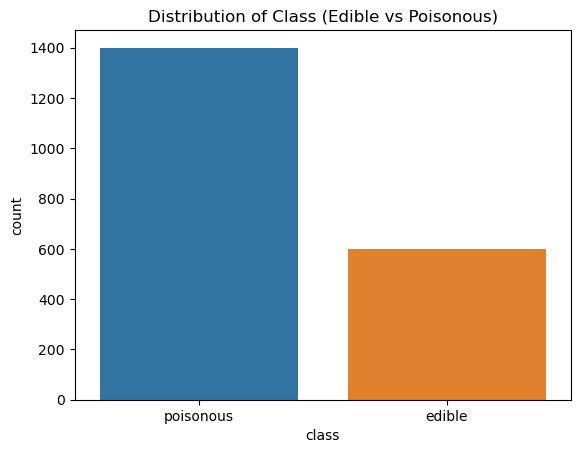

In [4]:
# Countplot of Target Variable
sns.countplot(x='class', data=df)
plt.title("Distribution of Class (Edible vs Poisonous)")
plt.show()

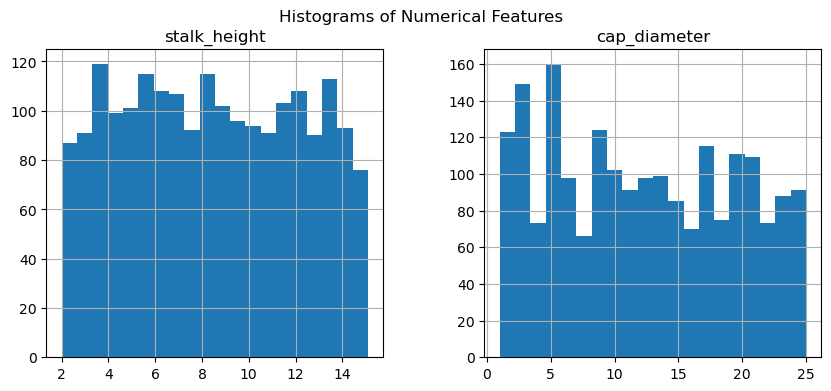

In [5]:
# Histogram for Numerical Features
numerical_cols = ['stalk_height', 'cap_diameter']
df[numerical_cols].hist(bins=20, figsize=(10, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()


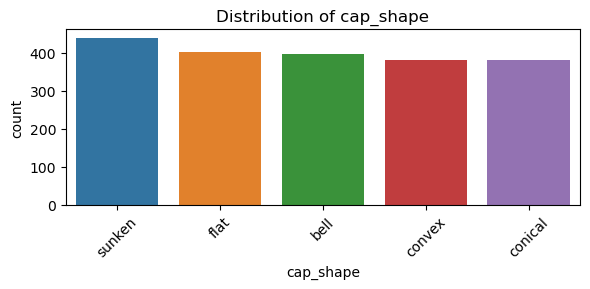

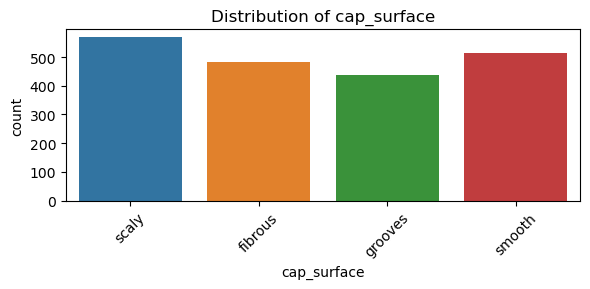

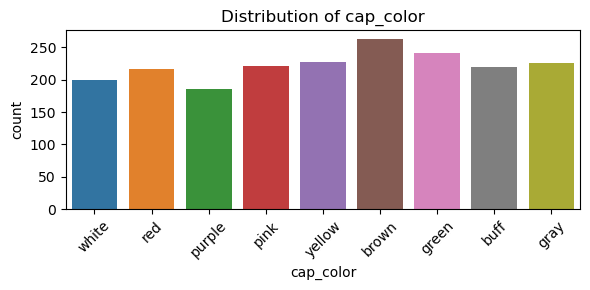

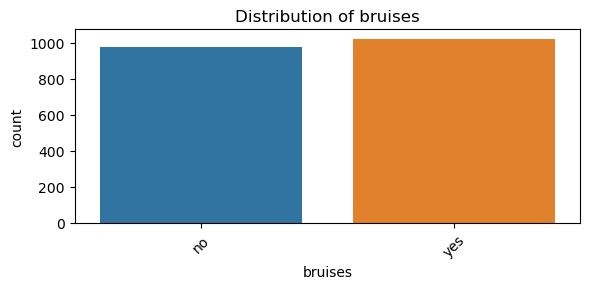

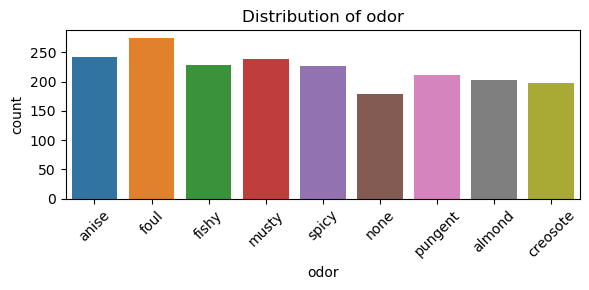

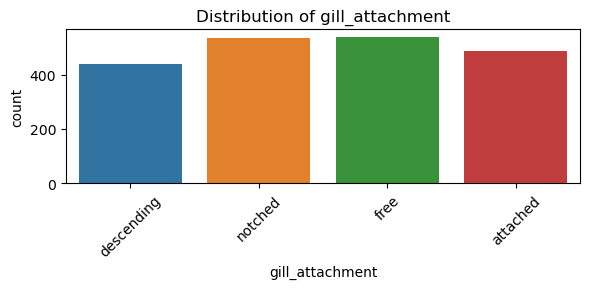

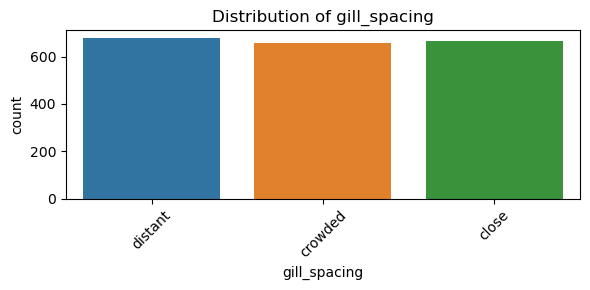

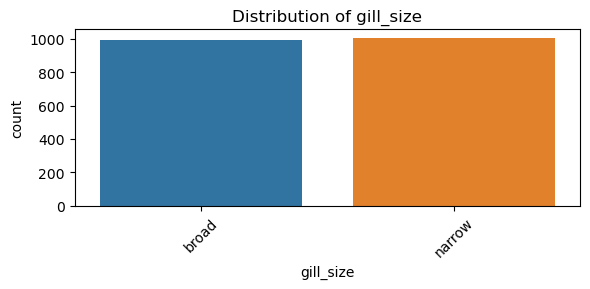

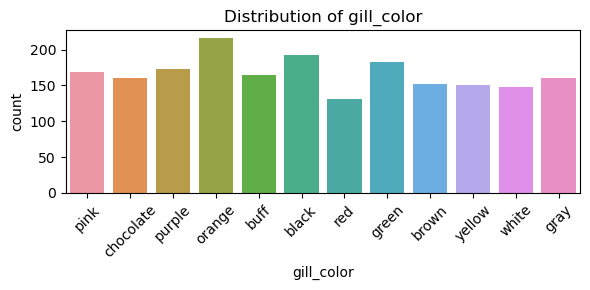

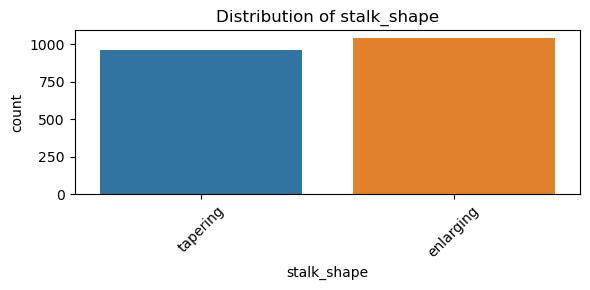

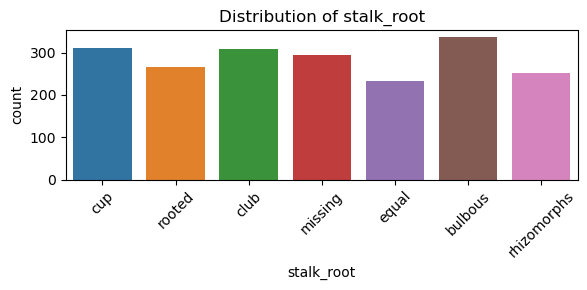

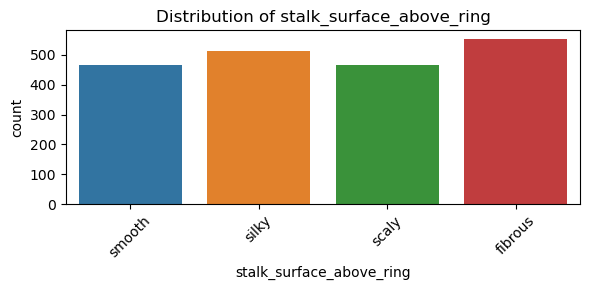

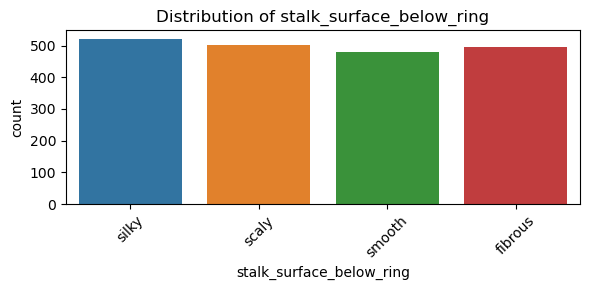

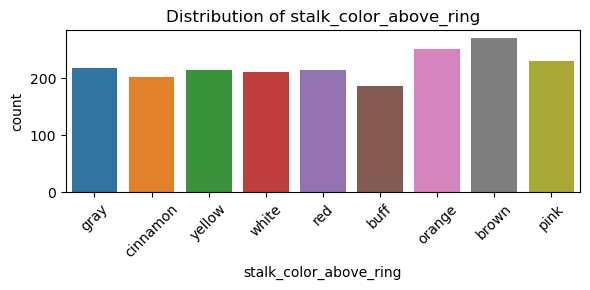

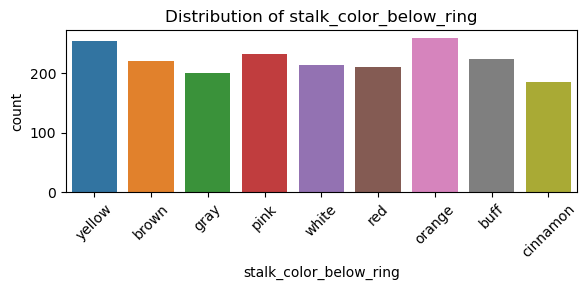

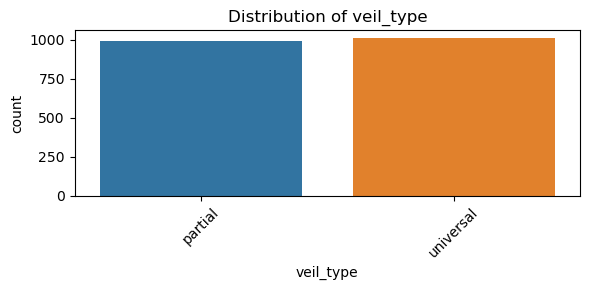

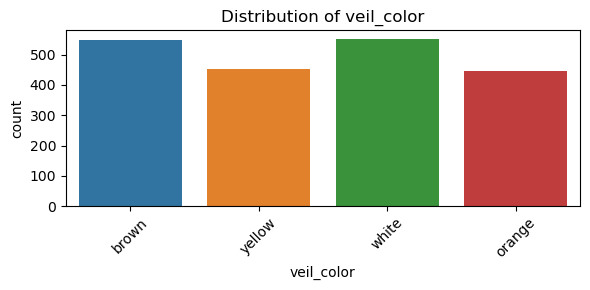

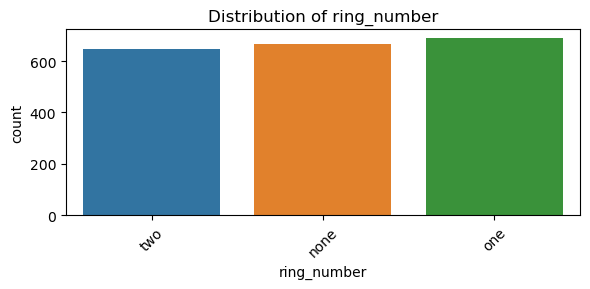

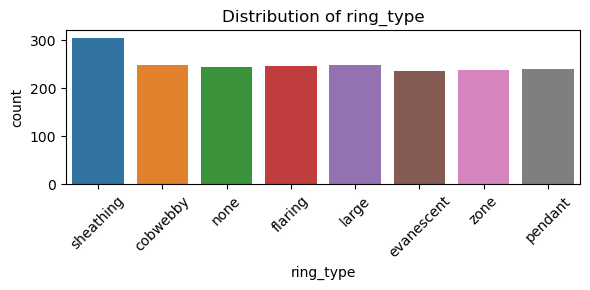

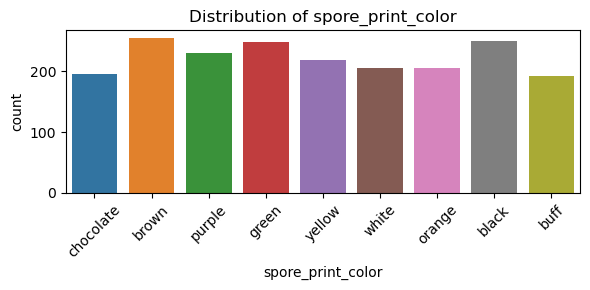

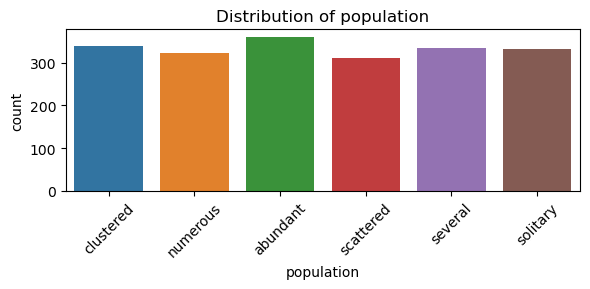

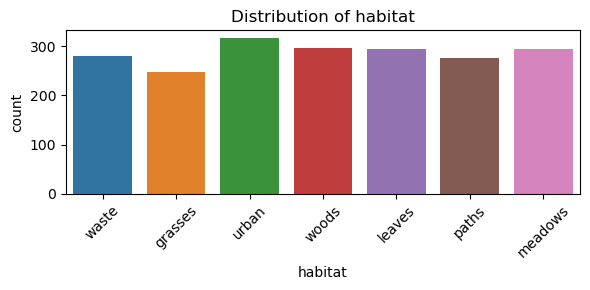

In [6]:
# Countplots for Categorical Features
categorical_cols = df.select_dtypes(include='object').columns.drop('class')
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [7]:
# Label Encode all Categorical Features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split into X and y
X = df.drop('class', axis=1)
y = df['class']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train SVM with default RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_rbf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.27      0.42       180
           1       0.76      0.99      0.86       420

    accuracy                           0.78       600
   macro avg       0.84      0.63      0.64       600
weighted avg       0.81      0.78      0.73       600



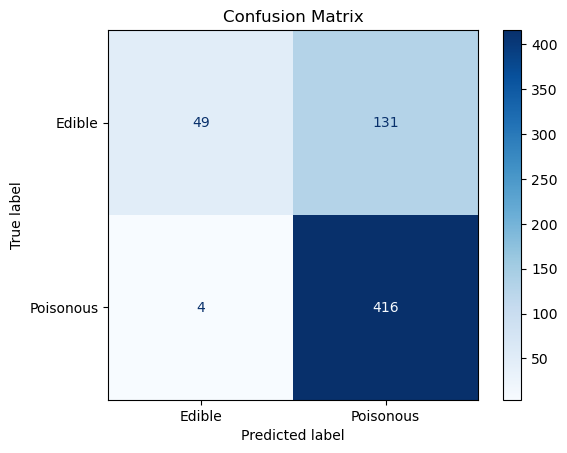

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [10]:
# Kernels to Test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)


    Kernel  Accuracy  Precision    Recall  F1 Score
0   linear  0.700000   0.700000  1.000000  0.823529
1     poly  0.816667   0.799228  0.985714  0.882729
2      rbf  0.775000   0.760512  0.990476  0.860393
3  sigmoid  0.680000   0.693878  0.971429  0.809524
